In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Define the base directory path
base_dir = "/Users/marcozamp/Desktop/hpc_project/Excercise_1/bcast/results"

# Define file paths using os.path.join to concatenate the base directory with the specific file names
bcast_paths = {
    "bcast_chain": os.path.join(base_dir, "bcast_chain.csv"),
    "bcast_default": os.path.join(base_dir, "bcast_default.csv"),
    "bcast_binarytree": os.path.join(base_dir, "bcast_binarytree.csv"),
    "bcast_pipeline": os.path.join(base_dir, "bcast_pipeline.csv")
}


for name, path in bcast_paths.items():
    # Read CSV into DataFrame
    df = pd.read_csv(path)
    # Create DataFrame with dynamic name using globals()
    globals()[f"df_{name}"] = df

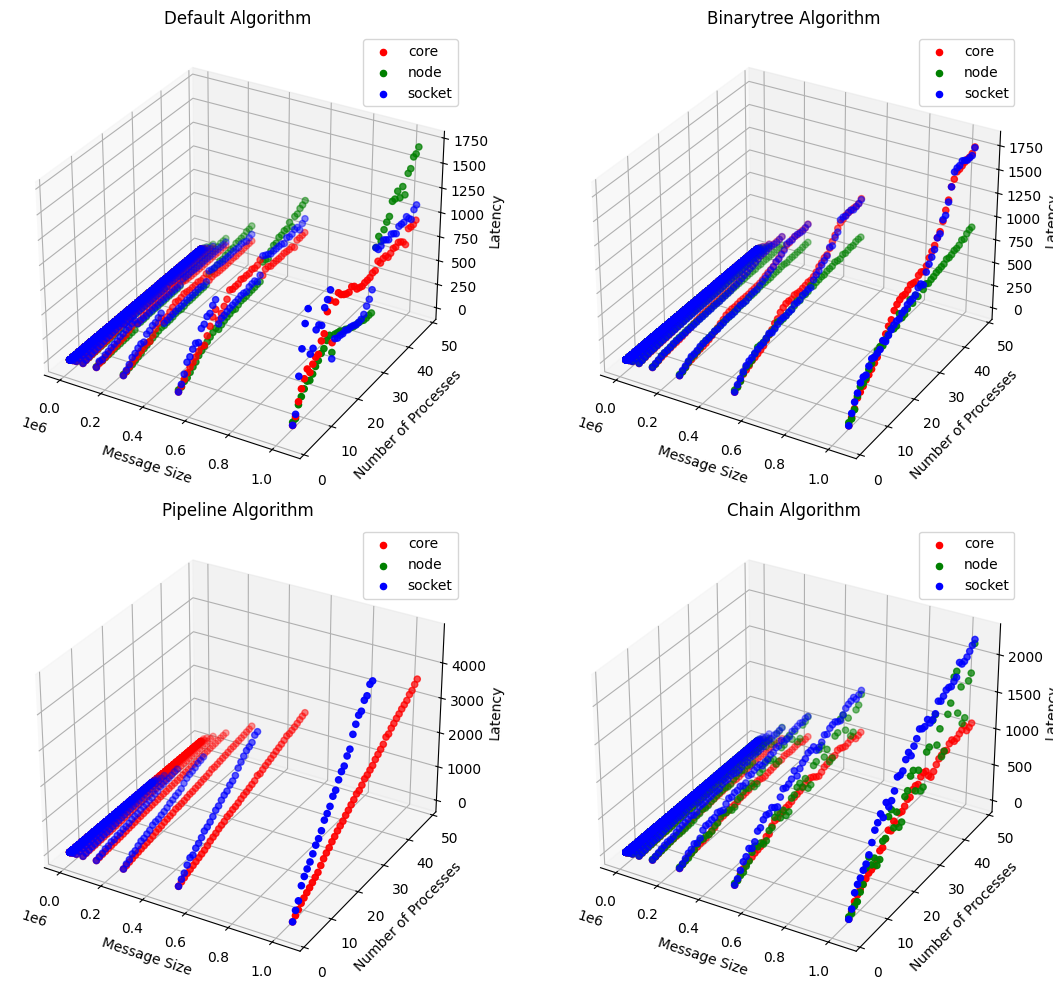

In [5]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Define the list of algorithms and their corresponding DataFrames
algorithms = ['Default', 'Binarytree', 'Pipeline', 'Chain']
dfs = [df_bcast_default, df_bcast_binarytree, df_bcast_pipeline, df_bcast_chain]

# Iterate over each subplot and corresponding algorithm's DataFrame
for ax, algorithm, df in zip(axs.flatten(), algorithms, dfs):
    # Iterate over each group-by option (node, core, socket)
    for allocation, color in zip(['core', 'node', 'socket'], ['r', 'g', 'b']):
        # Filter DataFrame based on allocation type
        df_allocation = df[df['Allocation'] == allocation]
        # Scatter plot for the current group-by option
        ax.scatter(df_allocation['MessageSize'], df_allocation['Processes'], df_allocation['Latency'], c=color, label=allocation, marker='o')

    # Set labels and title
    ax.set_xlabel('Message Size')  # Switched with 'Number of Processes'
    ax.set_ylabel('Number of Processes')  # Switched with 'Message Size'
    ax.set_zlabel('Latency')
    ax.set_title(f'{algorithm} Algorithm')
    ax.legend()

plt.tight_layout()
plt.show()



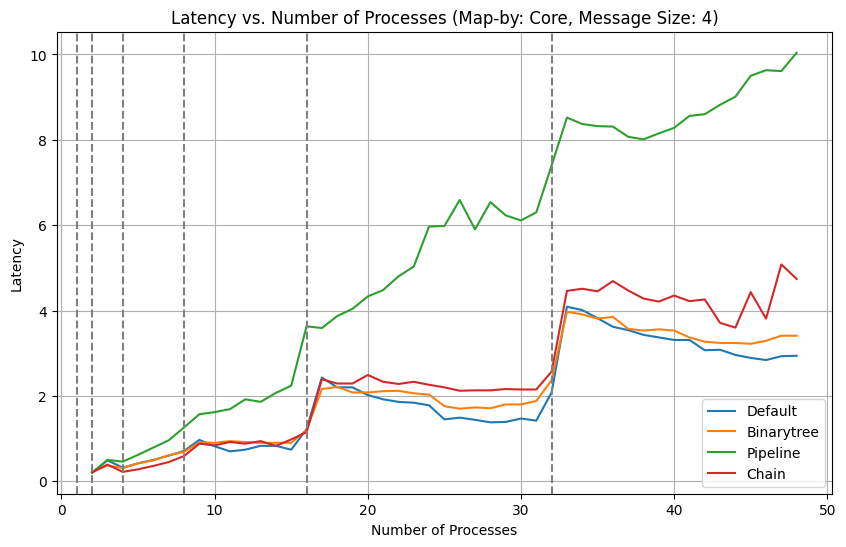

In [6]:
plt.figure(figsize=(10, 6))

# Iterate over each algorithm's DataFrame
for algorithm, df in zip(algorithms, dfs):
    # Filter DataFrame based on map-by option and fixed message size
    df_filtered = df[(df['Allocation'] == 'core') & (df['MessageSize'] == 4)]
    
    # Plot number of processes vs. latency
    plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=algorithm)

# Set labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Latency')
plt.title('Latency vs. Number of Processes (Map-by: Core, Message Size: 4)')
plt.legend()
plt.grid(True)

# Add vertical lines on powers of 2
max_processes = max(df_filtered['Processes'])
powers_of_2 = [2 ** i for i in range(int(np.log2(max_processes)) + 1)]
for power in powers_of_2:
    plt.axvline(x=power, linestyle='--', color='gray')

# Show the plot
plt.show()


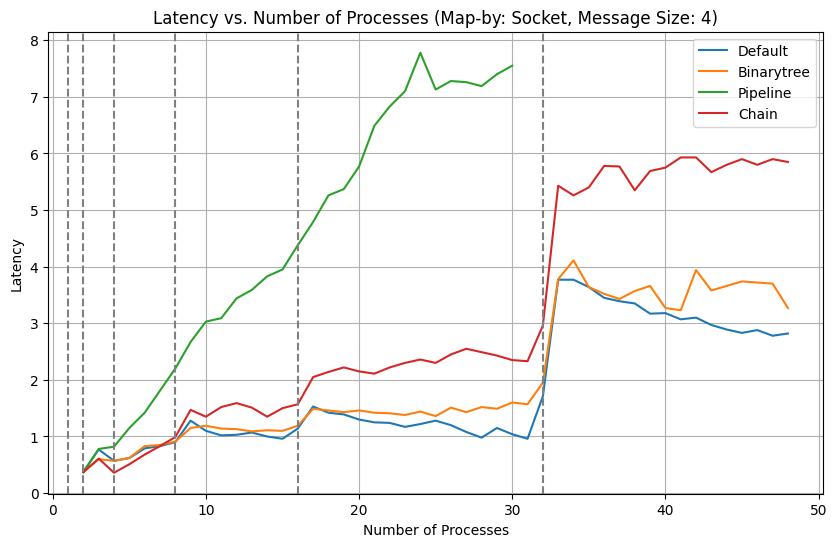

In [9]:
plt.figure(figsize=(10, 6))

# Iterate over each algorithm's DataFrame
for algorithm, df in zip(algorithms, dfs):
    # Filter DataFrame based on map-by option and fixed message size
    df_filtered = df[(df['Allocation'] == 'socket') & (df['MessageSize'] == 4)]
    
    # Plot number of processes vs. latency
    plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=algorithm)

# Set labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Latency')
plt.title('Latency vs. Number of Processes (Map-by: Socket, Message Size: 4)')
plt.legend()
plt.grid(True)

# Add vertical lines on powers of 2
max_processes = max(df_filtered['Processes'])
powers_of_2 = [2 ** i for i in range(int(np.log2(max_processes)) + 1)]
for power in powers_of_2:
    plt.axvline(x=power, linestyle='--', color='gray')

# Show the plot
plt.show()


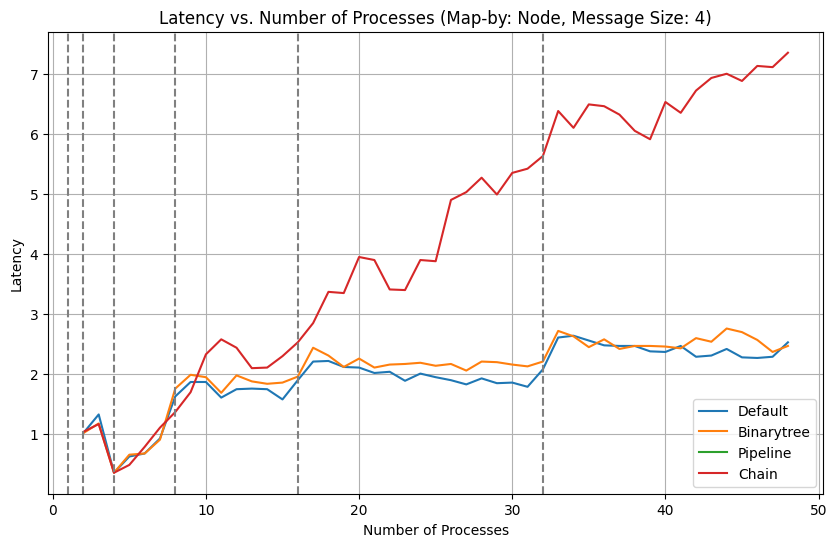

In [10]:
plt.figure(figsize=(10, 6))

# Iterate over each algorithm's DataFrame
for algorithm, df in zip(algorithms, dfs):
    # Filter DataFrame based on map-by option and fixed message size
    df_filtered = df[(df['Allocation'] == 'node') & (df['MessageSize'] == 4)]
    
    # Plot number of processes vs. latency
    plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=algorithm)

# Set labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Latency')
plt.title('Latency vs. Number of Processes (Map-by: Node, Message Size: 4)')
plt.legend()
plt.grid(True)

# Add vertical lines on powers of 2
max_processes = max(df_filtered['Processes'])
powers_of_2 = [2 ** i for i in range(int(np.log2(max_processes)) + 1)]
for power in powers_of_2:
    plt.axvline(x=power, linestyle='--', color='gray')

# Show the plot
plt.show()
